# Analysis of E-mini S&P 500 Futures (ES=F)

This notebook analyzes the historical price data of the E-mini S&P 500 futures contract (ticker: ES=F) using the yfinance library to download the data and matplotlib for visualization.

The analysis includes:
1. Downloading and plotting the closing prices.
2. Calculating and printing daily returns and annualized returns.
3. Plotting cumulative returns and rolling mean returns for different periods (1 year, 3 years, 5 years, 10 years).
4. Calculating and printing annualized volatility, downside volatility, and upside volatility.
5. Plotting cumulative returns along with rolling volatility and rolling downside volatility.
6. Calculating and plotting drawdowns, expanding maximum drawdowns, and filling the area between the drawdowns.

The script uses rolling windows to calculate mean returns and volatilities, and it visualizes the results using matplotlib.

## Import Libraries

First, we import the necessary libraries: yfinance for downloading financial data, matplotlib for plotting, and numpy for numerical operations.

In [1]:
# Import the yfinance library for downloading financial data
import yfinance as yf

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import numpy for numerical operations
import numpy as np

## Download Historical Data

We define the ticker symbol for the E-mini S&P 500 futures contract and download the historical data using yfinance.

In [2]:
# Define the ticker symbol for the E-mini S&P 500 futures contract
ticker = ["ES=F"]

# Download historical data for the specified ticker
data = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


## Extract and Plot Closing Prices

We extract the closing prices from the downloaded data and plot them to visualize the price movements over time.


Ticker         ES=F
Date               
2000-09-18  1467.50
2000-09-19  1478.50
2000-09-20  1469.50
2000-09-21  1469.50
2000-09-22  1468.50
...             ...
2025-01-31  6067.25
2025-02-03  6022.25
2025-02-04  6063.00
2025-02-05  6086.50
2025-02-06  6099.75

[6160 rows x 1 columns]



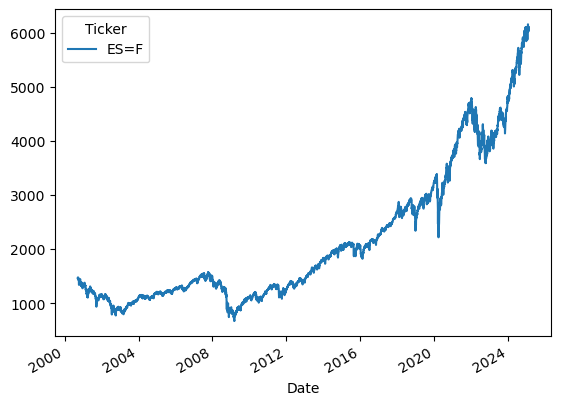

In [3]:
# Extract the closing prices from the downloaded data
prices = data["Close"]

# Print a blank line for better readability
print()

# Print the closing prices
print(prices)

# Print a blank line for better readability
print()

# Plot the closing prices
prices.plot()

# Display the plot
plt.show()

## Calculate Daily Returns

We calculate the daily returns as the percentage change in closing prices and print them.

In [4]:
# Calculate daily returns as the percentage change in closing prices
returns = prices.pct_change()

# Print a blank line for better readability
print()

# Print the daily returns
print(returns)

# Print a blank line for better readability
print()


Ticker          ES=F
Date                
2000-09-18       NaN
2000-09-19  0.007496
2000-09-20 -0.006087
2000-09-21  0.000000
2000-09-22 -0.000681
...              ...
2025-01-31 -0.005247
2025-02-03 -0.007417
2025-02-04  0.006767
2025-02-05  0.003876
2025-02-06  0.002177

[6160 rows x 1 columns]



## Calculate Annualized Return

We calculate the mean daily return and annualize it by multiplying by 252 (the number of trading days in a year). Then, we print the annualized return.

In [5]:
# Calculate the mean daily return
daily_mean_return = returns.mean().iloc[0]

# Annualize the mean daily return (assuming 252 trading days in a year)
annual_return = daily_mean_return * 252

# Print the annualized return
print(f"annual_return: {annual_return:.1%}")

annual_return: 7.7%


## Calculate Cumulative Returns

We calculate the cumulative returns by compounding the daily returns.

In [6]:
# Calculate cumulative returns
cum_returns = (1 + returns).cumprod()

## Calculate Rolling Mean Returns

We calculate the rolling mean returns for different periods (1 year, 3 years, 5 years, 10 years) using a rolling window.

In [7]:
# Annualize the daily returns
annual_returns = returns * 252

# Calculate rolling mean return for a 1-year window
rolling_mean_return_1y = annual_returns.rolling(252).mean()

# Calculate rolling mean return for a 3-year window
rolling_mean_return_3y = annual_returns.rolling(756).mean()

# Calculate rolling mean return for a 5-year window
rolling_mean_return_5y = annual_returns.rolling(1260).mean()

# Calculate rolling mean return for a 10-year window
rolling_mean_return_10y = annual_returns.rolling(2520).mean()

## Calculate Annualized Volatility

We calculate the annualized volatility, downside volatility, and upside volatility. Then, we print the annualized volatility and downside volatility.

In [8]:
# Calculate annualized volatility
annual_vol = returns.std().iloc[0] * np.sqrt(252)

# Calculate rolling volatility for a 1-year window
rolling_vol_1y = returns.rolling(252).std() * np.sqrt(252)

# Calculate downside volatility
downside_vol = returns[returns < returns.mean().iloc[0]].std().iloc[0] * np.sqrt(252)

# Calculate upside volatility
upside_vol = returns[returns > returns.mean().iloc[0]].std().iloc[0] * np.sqrt(252)

# Calculate rolling downside volatility for a 1-year window
rolling_down_vol_1y = returns[returns < 0].dropna().rolling(252).std() * np.sqrt(252)

# Print the annualized volatility
print(f"annual_vol: {annual_vol:.1%}")

# Print the downside volatility
print(f"downside_vol: {downside_vol:.1%}")

annual_vol: 19.4%
downside_vol: 15.4%


## Plot Cumulative Returns and Rolling Mean Returns

We plot the cumulative returns along with the rolling mean returns for different periods (1 year, 3 years, 10 years).

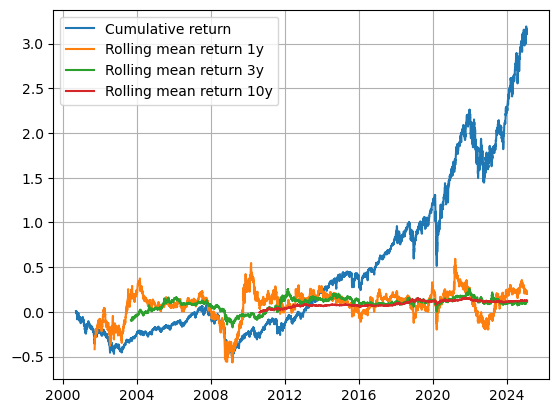

In [9]:
# Plot cumulative returns
plt.plot(cum_returns - 1, label="Cumulative return")

# Plot rolling mean return for a 1-year window
plt.plot(rolling_mean_return_1y, label="Rolling mean return 1y")

# Plot rolling mean return for a 3-year window
plt.plot(rolling_mean_return_3y, label="Rolling mean return 3y")

# Plot rolling mean return for a 10-year window
plt.plot(rolling_mean_return_10y, label="Rolling mean return 10y")

# Add a legend to the plot
plt.legend()

# Add a grid to the plot
plt.grid()

# Display the plot
plt.show()

## Plot Cumulative Returns and Rolling Volatility

We plot the cumulative returns along with the rolling volatility for a 1-year window.

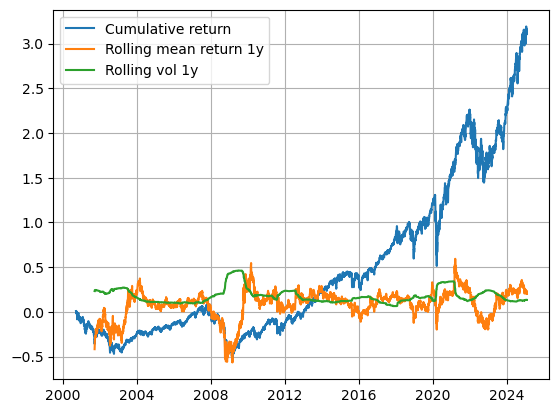

In [10]:
# Plot cumulative returns
plt.plot(cum_returns - 1, label="Cumulative return")

# Plot rolling mean return for a 1-year window
plt.plot(rolling_mean_return_1y, label="Rolling mean return 1y")

# Plot rolling volatility for a 1-year window
plt.plot(rolling_vol_1y, label="Rolling vol 1y")

# Add a legend to the plot
plt.legend()

# Add a grid to the plot
plt.grid()

# Display the plot
plt.show()

## Calculate and Plot Drawdowns

We calculate the drawdowns as the difference between cumulative returns and cumulative maximum returns. Then, we plot the cumulative returns, expanding maximum drawdowns, and fill the area between the drawdowns. We also plot the rolling volatility and rolling downside volatility for a 1-year window.

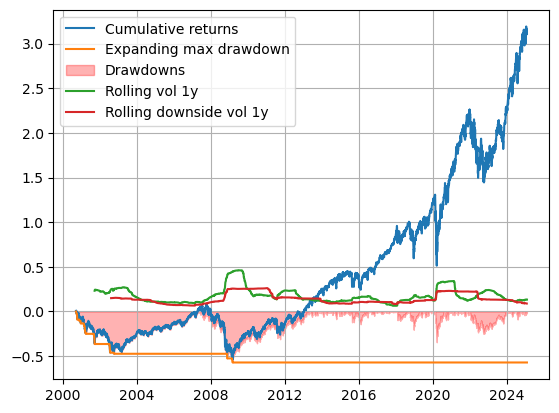

In [11]:
# Calculate the cumulative maximum returns
cum_max = cum_returns.cummax()

# Calculate drawdowns as the difference between cumulative returns and cumulative maximum returns
drawdowns = (cum_returns - cum_max) / cum_max

# Calculate the expanding minimum drawdowns
expanding_drawdowns = drawdowns.expanding().min()

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Plot cumulative returns
ax.plot(
    cum_returns.index,  # X-axis: dates
    (cum_returns - 1).values.T[0],  # Y-axis: cumulative returns
    label="Cumulative returns",  # Label for the cumulative returns plot
)

# Plot expanding maximum drawdowns
ax.plot(
    expanding_drawdowns.index,  # X-axis: dates
    expanding_drawdowns.values.T[0],  # Y-axis: expanding maximum drawdowns
    label="Expanding max drawdown",  # Label for the expanding maximum drawdowns plot
)

# Fill the area between the drawdowns
ax.fill_between(
    drawdowns.index,  # X-axis: dates
    drawdowns.values.T[0],  # Y-axis: drawdowns
    color="red",  # Color for the filled area
    alpha=0.3,  # Transparency level for the filled area
    label="Drawdowns",  # Label for the drawdowns plot
)

# Plot rolling volatility for a 1-year window
ax.plot(rolling_vol_1y, label="Rolling vol 1y")

# Plot rolling downside volatility for a 1-year window
plt.plot(rolling_down_vol_1y, label="Rolling downside vol 1y")

# Add a grid to the plot
ax.grid()

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()